In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import scipy.stats
from scipy.stats import pearsonr
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro, f_oneway
from statsmodels.stats.stattools import durbin_watson
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the csv file into pandas dataframe and inspecting the first 5 rows
cars = pd.read_csv("data\cleaned_cars.csv") #index_col = 0
cars.head() 

,Make,YOM,Color,Used,Transmission,Mileage,Location,Price,City,Area
0,Nissan,2014,Black,Foreign Used,Automatic,136000.0,"Nairobi, Karen",2050000,Nairobi,Karen
1,Nissan,2014,Silver,Foreign Used,Automatic,85000.0,"Nairobi, Kilimani",1380000,Nairobi,Kilimani
2,Nissan,2013,Gray,Foreign Used,Automatic,90231.0,"Nairobi, Ridgeways",995000,Nairobi,Ridgeways
3,Nissan,2014,White,Foreign Used,Automatic,52000.0,"Nairobi, Jamhuri",2500000,Nairobi,Jamhuri
4,Nissan,2014,White,Foreign Used,Automatic,86532.0,"Mombasa, Mombasa CBD",1100000,Mombasa,Mombasa CBD


In [3]:
# check the last 5 rows
cars.tail()

,Make,YOM,Color,Used,Transmission,Mileage,Location,Price,City,Area
45142,Alfa,2015,Black,Foreign Used,Automatic,86532.0,"Nairobi, Kilimani",1800000,Nairobi,Kilimani
45143,Alfa,2016,White,Foreign Used,Automatic,75048.0,"Nairobi, Ridgeways",1500000,Nairobi,Ridgeways
45144,Alfa,2002,Red,Kenyan Used,Automatic,72000.0,"Nairobi, Westlands",289000,Nairobi,Westlands
45145,Alfa,1992,Blue,Kenyan Used,Manual,150000.0,"Nairobi, Karen",300000,Nairobi,Karen
45146,Alfa,1987,Red,Kenyan Used,Manual,86532.0,"Kajiado, Ongata Rongai",80000,Kajiado,Ongata Rongai


In [4]:
#checking the number of rows and columns
cars.shape
print("No of rows", cars.shape[0])
print("No of columns", cars.shape[1])

No of rows 45147
No of columns 10


## Get information about our dataset like the total number of rows, total number of columns, data type of each column and memory requirement

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45147 entries, 0 to 45146
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          45147 non-null  object 
 1   YOM           45147 non-null  int64  
 2   Color         45147 non-null  object 
 3   Used          45147 non-null  object 
 4   Transmission  45147 non-null  object 
 5   Mileage       45147 non-null  float64
 6   Location      45147 non-null  object 
 7   Price         45147 non-null  int64  
 8   City          45147 non-null  object 
 9   Area          44821 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 3.4+ MB


In [6]:
#checking the number of missing values
cars.isnull().sum()

Make              0
YOM               0
Color             0
Used              0
Transmission      0
Mileage           0
Location          0
Price             0
City              0
Area            326
dtype: int64

In [7]:
# Check for duplicates
duplicates = cars.duplicated()
duplicates_count = duplicates.sum()
print("Number of duplicate rows:", duplicates_count)

# Print the rows with duplicates
if duplicates_count > 0:
    duplicate_rows = cars[duplicates]
    print("Duplicate rows:")
    print(duplicate_rows[:5])
else:
    print("No duplicate rows found.")

Number of duplicate rows: 7500
Duplicate rows:
      Make   YOM   Color          Used Transmission  Mileage  \
11  Nissan  2014   White  Foreign Used    Automatic  86532.0   
14  Nissan  2015   Black  Foreign Used    Automatic  86532.0   
22  Nissan  2014  Silver  Foreign Used    Automatic  86532.0   
25  Nissan  2014  Silver  Foreign Used    Automatic  86532.0   
27  Nissan  2014  Silver  Foreign Used    Automatic  86532.0   

                    Location    Price     City              Area  
11      Mombasa, Mombasa CBD  1100000  Mombasa       Mombasa CBD  
14         Nairobi, Kilimani  2550000  Nairobi          Kilimani  
22  Nairobi, Nairobi Central  1150000  Nairobi   Nairobi Central  
25  Nairobi, Nairobi Central  1150000  Nairobi   Nairobi Central  
27  Nairobi, Nairobi Central  1150000  Nairobi   Nairobi Central  


Choosing the median as a replacement for "Unavailable" values in the "Mileage" column is a common strategy when dealing with missing or unavailable numerical data. The median is a measure of central tendency that is less sensitive to outliers than the mean.

In [8]:
# Convert the 'Mileage' column to numeric, excluding 'Unavailable' values
cars['Mileage'] = pd.to_numeric(cars['Mileage'], errors='coerce')

# Replace 'Unavailable' with the median of numeric values
cars['Mileage'].replace('Unavailable', cars['Mileage'].median(), inplace=True)

### **Analysing Price Feature**

In [9]:
# # Step 1: Remove non-numeric characters
# cars['Price'] = cars['Price'].replace('[^\d.]', '', regex=True)

# # Step 2: Convert to numeric
# cars['Price'] = pd.to_numeric(cars['Price'], errors='coerce')

# # # Now, calculate the mean and fill missing values
# # mean_price = cars['Price'].mean()
# # cars['Price'].fillna(mean_price, inplace=True)

### Overal statistics about the dataset

In [10]:
cars.describe()

,YOM,Mileage,Price
count,45147.000000,4.514700e+04,4.514700e+04
mean,2011.738100,9.979353e+04,1.967034e+06
std,4.499485,9.311228e+04,2.015689e+06
min,1957.000000,1.000000e+00,6.000000e+04
25%,2011.000000,7.000000e+04,8.000000e+05
50%,2014.000000,8.653200e+04,1.350000e+06
75%,2014.000000,1.090000e+05,2.350000e+06
max,2021.000000,1.980000e+06,2.840000e+07


# Exploratory data analysis

### Univariate Analysis

### Categorical

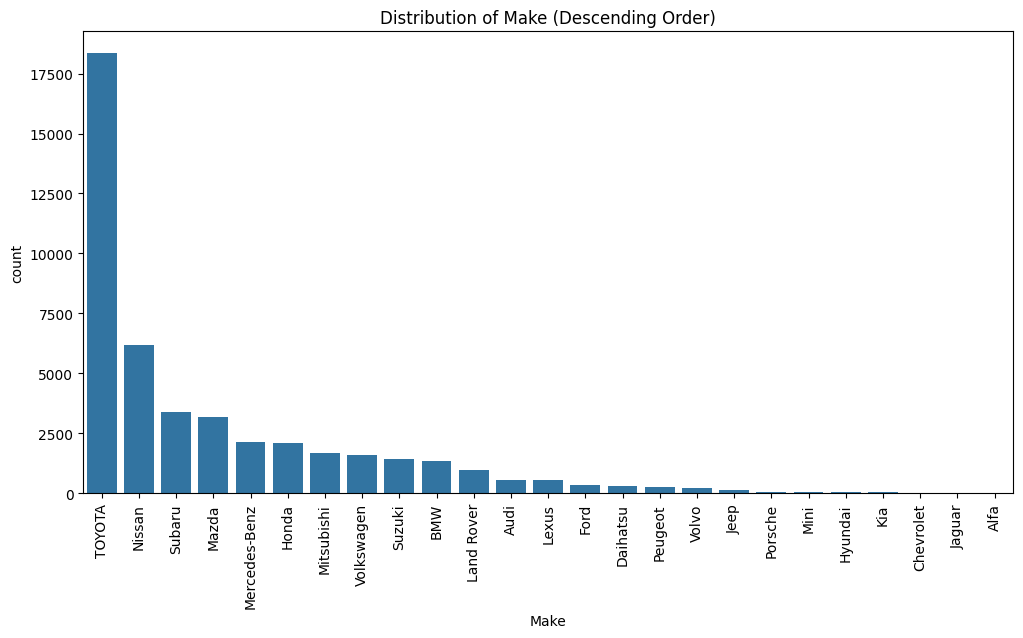

In [11]:
# Univariate analysis using a count plot for 'Make' in ascending order
plt.figure(figsize=(12, 6))
sns.countplot(x='Make', data=cars, order=cars['Make'].value_counts().index)
plt.title('Distribution of Make (Descending Order)')
plt.xticks(rotation=90)
plt.show()

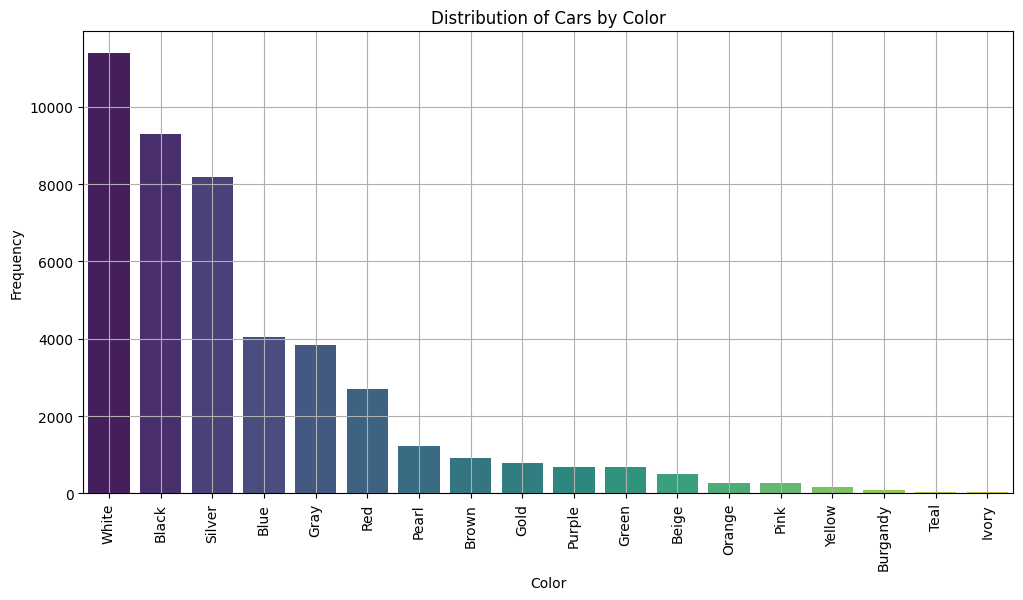

In [12]:
# Get the counts of each color in descending order
color_counts = cars['Color'].value_counts(ascending=False)

# Create a count plot with seaborn
plt.figure(figsize=(12, 6))
sns.countplot(x="Color", data=cars, order=color_counts.index, palette="viridis")
plt.title("Distribution of Cars by Color")
plt.xlabel("Color")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

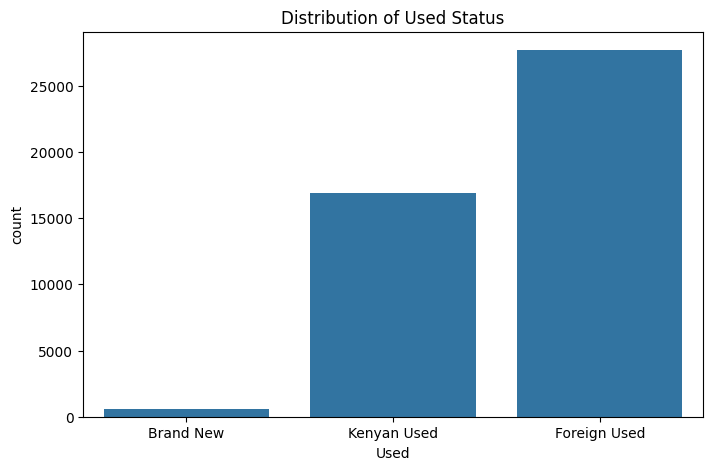

In [13]:
# Get the counts of each 'Used' status in ascending order
used_counts = cars['Used'].value_counts(ascending=True)

# Create a count plot with seaborn
plt.figure(figsize=(8, 5))
sns.countplot(x='Used', data=cars, order=used_counts.index)
plt.title('Distribution of Used Status')
plt.show()

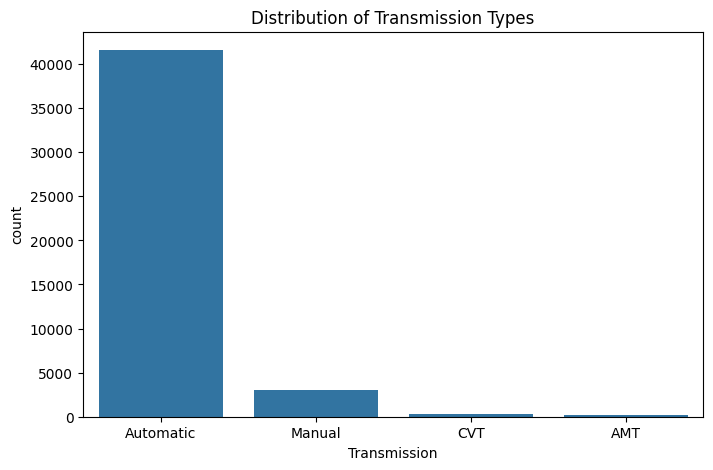

In [14]:
# Univariate analysis for 'Transmission'
plt.figure(figsize=(8, 5))
sns.countplot(x='Transmission', data=cars)
plt.title('Distribution of Transmission Types')
plt.show()


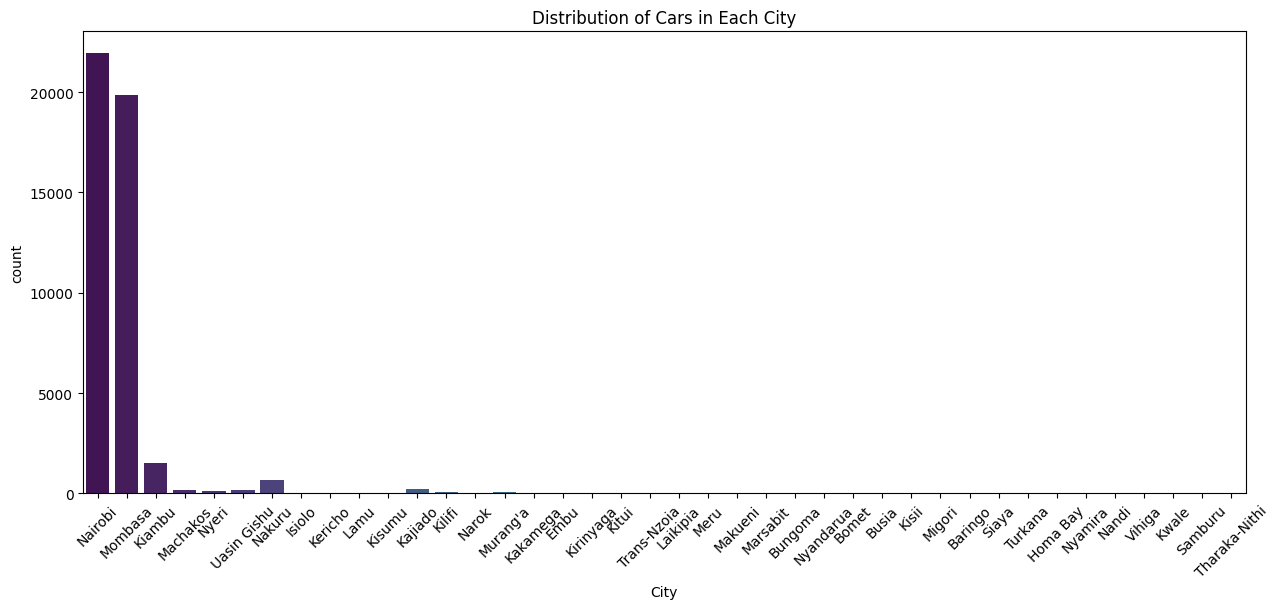

In [15]:
# Check if 'City' and 'Area' columns exist in the DataFrame
if 'City' in cars.columns and 'Area' in cars.columns:
    # Countplot for City
    plt.figure(figsize=(15, 6))
    sns.countplot(x='City', data=cars, palette='viridis')
    plt.title('Distribution of Cars in Each City')
    plt.xticks(rotation=45)
    plt.show()

   
else:
    print("The 'City' and/or 'Area' columns do not exist in the DataFrame.")

### Numerical

Skewness: 3.578377
Kurtosis: 18.893035


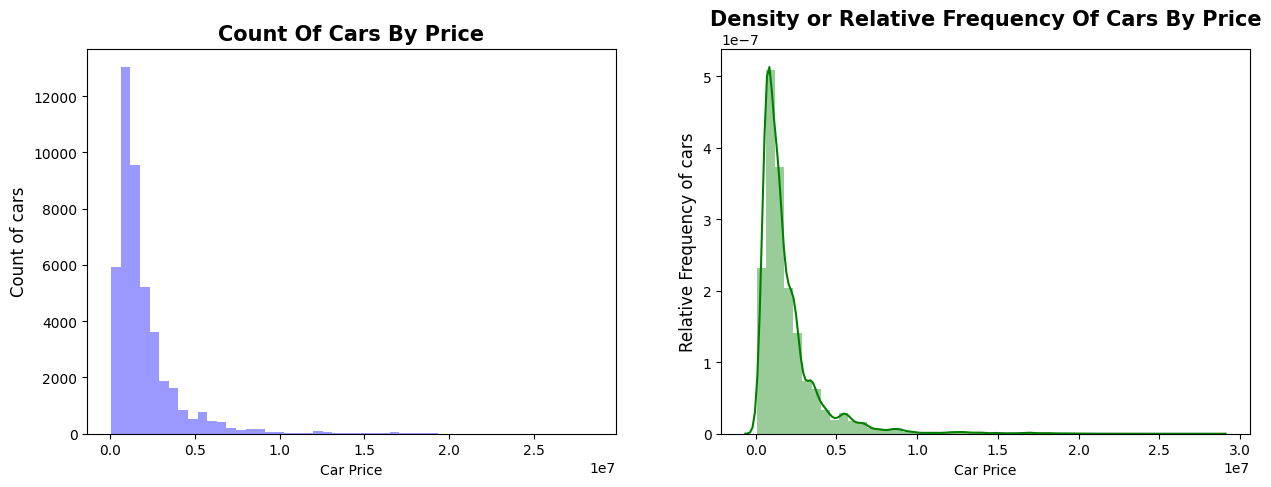

In [16]:
fig, ax= plt.subplots(1,2,figsize=(15,5))

sns.distplot(cars['Price'], norm_hist=False, kde=False, ax=ax[0], color='blue')
ax[0].set_xlabel('Car Price')
ax[0].set_ylabel('Count of cars',size=12)
ax[0].set_title('Count Of Cars By Price',size=15,weight="bold")

sns.distplot(cars['Price'], kde=True, ax=ax[1], color='green')
ax[1].set_xlabel('Car Price')
ax[1].set_ylabel('Relative Frequency of cars',size=12)
ax[1].set_title('Density or Relative Frequency Of Cars By Price',size=15,weight="bold")
#skewness and kurtosis
print("Skewness: %f" % cars['Price'].skew())
print("Kurtosis: %f" % cars['Price'].kurt())

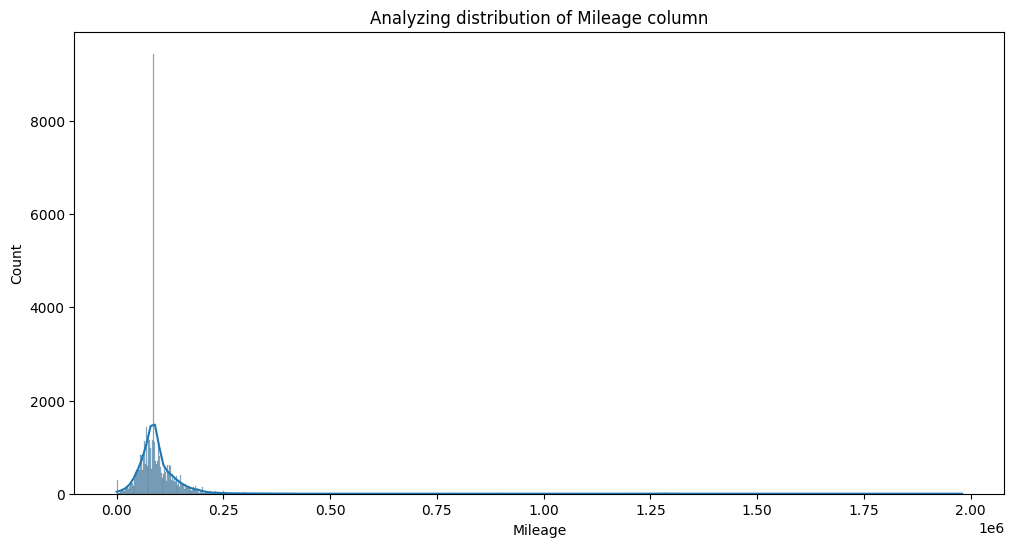

In [17]:
# Remove extra space from the column name
cars.rename(columns={'Mileage ': 'Mileage'}, inplace=True)

# Seeing how the numerical columns are distributed
plt.figure(figsize=(12, 6))
sns.histplot(x="Mileage", data=cars, kde=True)
plt.title("Analyzing distribution of Mileage column")
plt.show()

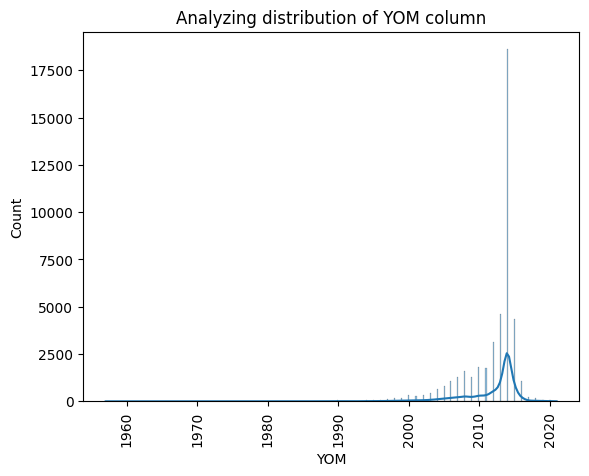

In [18]:
# Seeing how the numerical columns are distributed
sns.histplot(x="YOM", data=cars, kde=True)
plt.title("Analyzing distribution of YOM column")

# Rotate x-axis labels vertically
plt.xticks(rotation=90)

plt.show()

# Bivariate Analysis
- Analysis will be done for the target column charges

## Used and Price

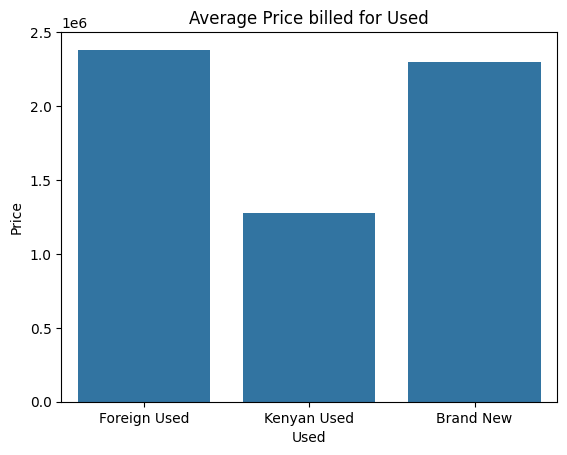

In [19]:
sns.barplot(x="Used",y="Price",data=cars,ci=False)
plt.title("Average Price billed for Used")
plt.show()

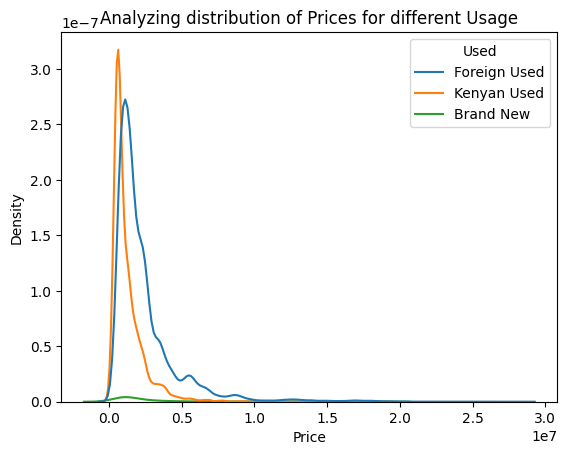

In [20]:
sns.kdeplot(x="Price",data=cars,hue="Used")
plt.title("Analyzing distribution of Prices for different Usage")
plt.show()

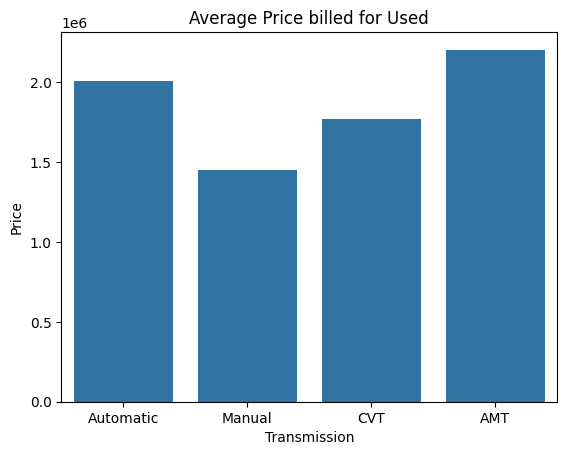

In [21]:
sns.barplot(x="Transmission",y="Price",data=cars,ci=False)
plt.title("Average Price billed for Used")
plt.show()

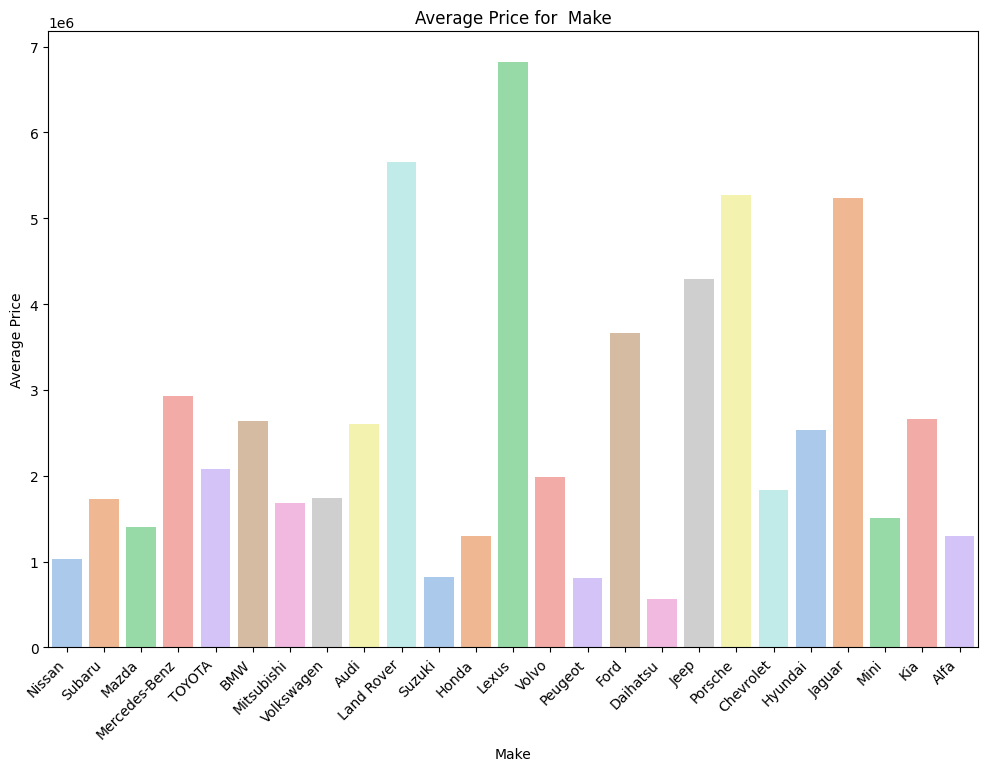

In [52]:
# Set a larger figure size and higher DPI
plt.figure(figsize=(12, 8), dpi=100)

# Create the bar plot
sns.barplot(x="Make", y="Price", data=cars, ci=False, palette="pastel")
plt.title("Average Price for  Make")

# Rotate x-axis tick labels by 45 degrees for better readability
plt.xticks(rotation=45, ha="right")

# Add labels to the axes
plt.xlabel("Make")
plt.ylabel("Average Price")

# Display the plot
plt.show()

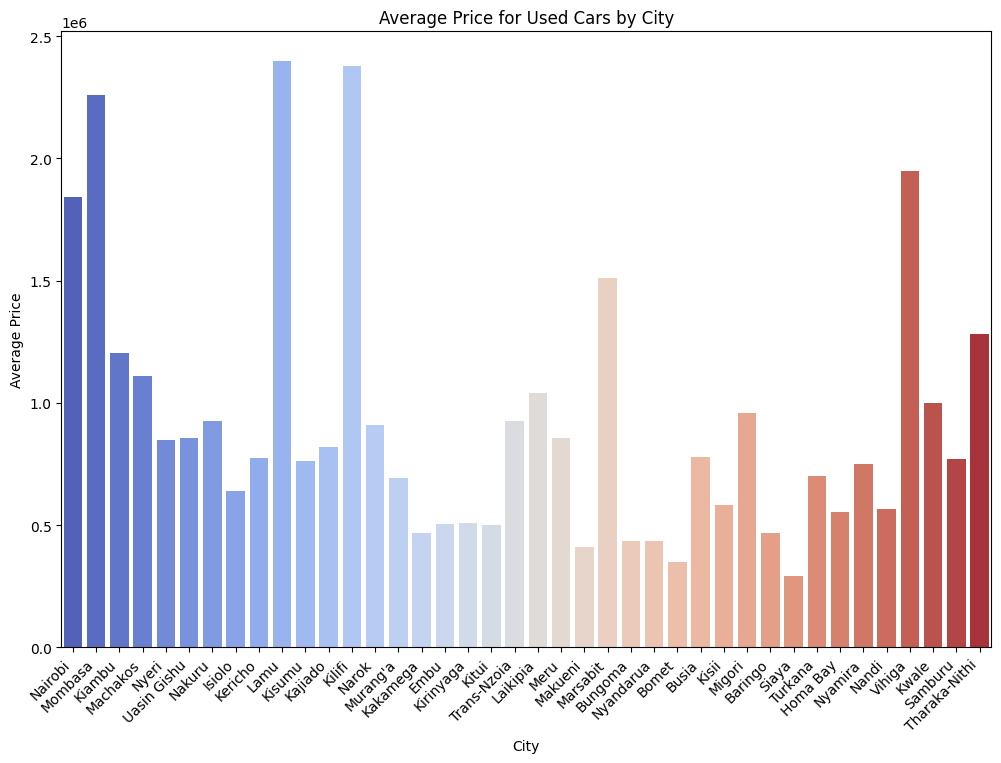

In [53]:
# Set a larger figure size and higher DPI
plt.figure(figsize=(12, 8), dpi=100)

# Create the bar plot
sns.barplot(x="City", y="Price", data=cars, ci=False, palette="coolwarm")
plt.title("Average Price for Used Cars by City")

# Rotate x-axis tick labels by 45 degrees for better readability
plt.xticks(rotation=45, ha="right")

# Add labels to the axes
plt.xlabel("City")
plt.ylabel("Average Price")

# Display the plot
plt.show()

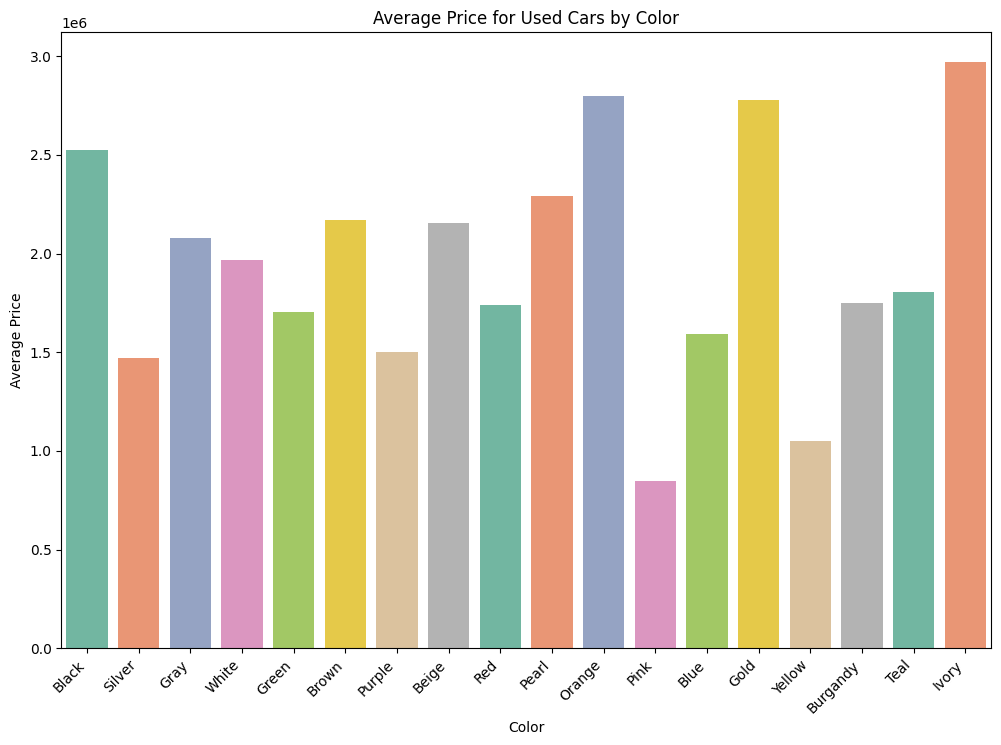

In [24]:
# Set a larger figure size and higher DPI
plt.figure(figsize=(12, 8), dpi=100)

# Create the bar plot
sns.barplot(x="Color", y="Price", data=cars, ci=False, palette="Set2")
plt.title("Average Price for Used Cars by Color")

# Rotate x-axis tick labels by 45 degrees for better readability
plt.xticks(rotation=45, ha="right")

# Add labels to the axes
plt.xlabel("Color")
plt.ylabel("Average Price")

# Display the plot
plt.show()

In [25]:
# # Set a larger figure size and higher DPI
# plt.figure(figsize=(10, 6), dpi=100)

# # Create the bar plot
# sns.barplot(x="Mileage", y="Price", data=cars, ci=False, palette="viridis")
# plt.title("Average Price for Used Cars based on Mileage")

# # Rotate x-axis tick labels by 45 degrees for better readability
# plt.xticks(rotation=45)

# # Add labels to the axes
# plt.xlabel("Mileage")
# plt.ylabel("Average Price")

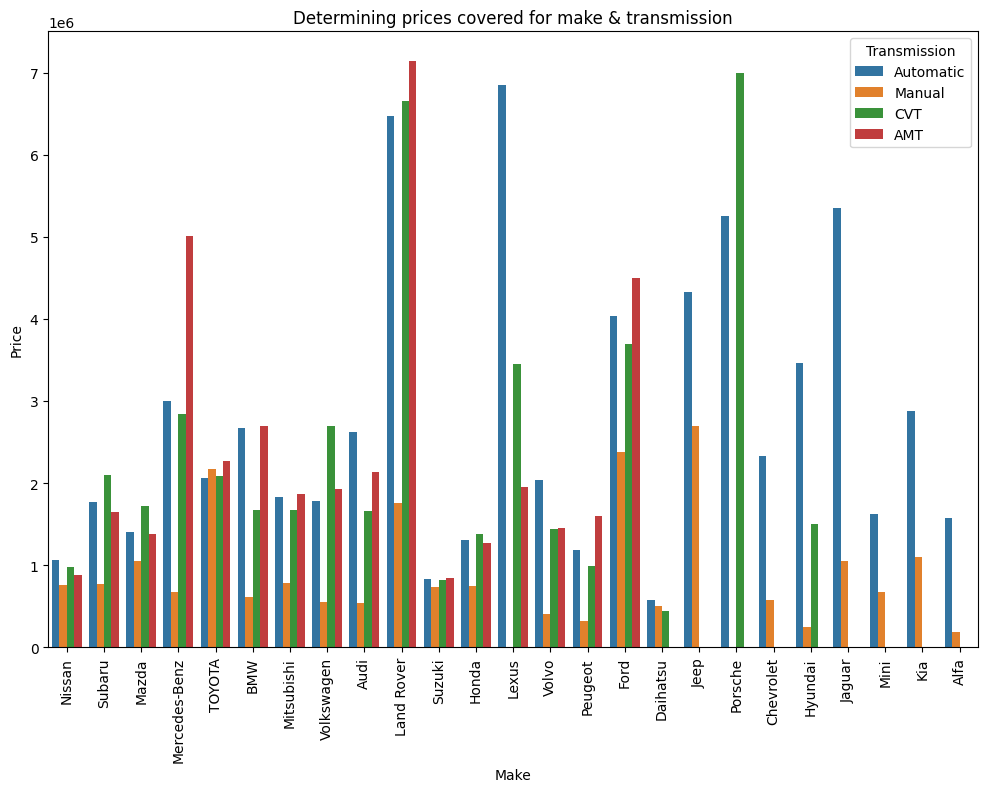

In [26]:
# # Convert relevant columns to strings
# cars['Make'] = cars['Make'].astype(str)
# cars['Transmission'] = cars['Transmission'].astype(str)

# Set a larger figure size and higher DPI
plt.figure(figsize=(12, 8), dpi=100)

# Create the bar plot
sns.barplot(x="Make", y="Price", data=cars, hue="Transmission", ci=False)
plt.title("Determining prices covered for make & transmission")

# Rotate x-axis tick labels by 90 degrees
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [27]:
# # Set a figure size
# plt.figure(figsize=(8, 6))

# # Create the bar plot with hue
# sns.barplot(x="Color", y="Price", data=cars, hue="City", ci=False)

# # Set a title
# plt.title("Determining prices covered for color & city")

# # Place the legend in the upper right corner
# plt.legend(loc="upper right")

# # Show the plot
# plt.show()

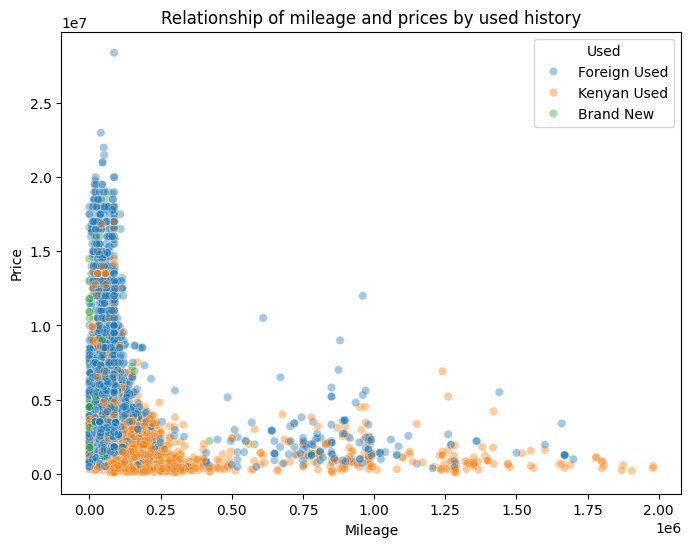

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Mileage",y="Price",data=cars,hue="Used",alpha=0.4)
plt.title("Relationship of mileage and prices by used history")
plt.show()

Chi-Square Statistic:

The Chi-Square Statistic is a measure of how much the observed counts in the contingency table deviate from what would be expected if there were no association between the variables. A larger Chi-Square Statistic indicates a stronger association.
P-value:

The p-value associated with the Chi-Square Statistic is a measure of the evidence against a null hypothesis of no association. A very low p-value (close to zero) suggests that you reject the null hypothesis, indicating a significant association between the variables.

In [29]:
# Categorical outcome variable
outcome_variable = 'Price'

# List of categorical variables
categorical_variables = ['Color', 'Used', 'Transmission', 'Mileage', 'YOM', 'Make', 'City']

# Create an empty list to store results
chi_square_results = []

# Chi-Square Test for Independence for each categorical variable
for cat_var in categorical_variables:
    contingency_table = pd.crosstab(cars[cat_var], cars[outcome_variable])
    
    # Perform Chi-Square Test
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    # Append results to the list
    chi_square_results.append({
        'Variable': f"{cat_var} and {outcome_variable}",
        'Chi-Square Statistic': chi2,
        'P-value': p
    })

# Convert the list to a DataFrame
chi_square_results_df = pd.DataFrame(chi_square_results)

# Print the results DataFrame
print(chi_square_results_df)

                 Variable  Chi-Square Statistic  P-value
0         Color and Price          3.422971e+04      0.0
1          Used and Price          1.252070e+04      0.0
2  Transmission and Price          1.268226e+04      0.0
3       Mileage and Price          1.634566e+07      0.0
4           YOM and Price          2.003099e+05      0.0
5          Make and Price          9.650692e+04      0.0
6          City and Price          7.855836e+04      0.0


Color and Price:

A Chi-Square Statistic of 34229.71 with a p-value of 0.0 indicates a significant association between the 'Color' variable and 'Price.'

**Used and Price:**

A Chi-Square Statistic of 12520.70 with a p-value of 0.0 indicates a significant association between the 'Used' variable and 'Price.'

**Transmission and Price:**

A Chi-Square Statistic of 12682.26 with a p-value of 0.0 indicates a significant association between the 'Transmission' variable and 'Price.'

**Mileage and Price:**

A very large Chi-Square Statistic of 16345660.0 with a p-value of 0.0 indicates a significant association between the 'Mileage' variable and 'Price.'

**YOM and Price:**

A Chi-Square Statistic of 200309.90 with a p-value of 0.0 indicates a significant association between the 'YOM' variable and 'Price.'

**Make and Price:**

A Chi-Square Statistic of 96506.92 with a p-value of 0.0 indicates a significant association between the 'Make' variable and 'Price.'
City and Price:

A Chi-Square Statistic of 78558.36 with a p-value of 0.0 indicates a significant association between the 'City' variable and 'Price.'
In summary, all the p-values are very close to zero, suggesting that each categorical variable is significantly associated with the 'Price' variable. The Chi-Square Statistic values provide an indication of the strength of these associations.

# Analysis Of Variance Test (ANOVA) 
Test whether the means of two or more independent samples are significantly different from dependent sample

In the context of the ANOVA tests:

If the p-value is less than or equal to the significance level (commonly 0.05), you would reject the null hypothesis.
If the p-value is greater than the significance level, you would fail to reject the null hypothesis.

Test whether the means of two independent samples are significantlly different from dependent sample.

### Interpretation

- Make:

Null Hypothesis (H0): There is no significant difference in the mean "Price" across different car makes.
Alternative Hypothesis (H1): There is a significant difference in the mean "Price" across different car makes.
Color:

Null Hypothesis (H0): There is no significant difference in the mean "Price" across different car colors.
Alternative Hypothesis (H1): There is a significant difference in the mean "Price" across different car colors.
Used:

Null Hypothesis (H0): There is no significant difference in the mean "Price" between used cars and other categories.
Alternative Hypothesis (H1): There is a significant difference in the mean "Price" between used cars and other categories.
Transmission:

Null Hypothesis (H0): There is no significant difference in the mean "Price" across different transmission types.
Alternative Hypothesis (H1): There is a significant difference in the mean "Price" across different transmission types.

In [30]:
# Perform one-way ANOVA for categorical variables
for categorical_column in ["Make", "Color", "Used", "Transmission"]:
    grouped_data = cars.groupby(categorical_column)["Price"].apply(list)
    f_statistic, p_value = f_oneway(*grouped_data)
    print(f"ANOVA results for {categorical_column}: F-statistic = {f_statistic}, p-value = {p_value}")

ANOVA results for Make: F-statistic = 579.7894177967743, p-value = 0.0
ANOVA results for Color: F-statistic = 109.25009468556037, p-value = 0.0
ANOVA results for Used: F-statistic = 1697.3601662226918, p-value = 0.0
ANOVA results for Transmission: F-statistic = 74.9501471469098, p-value = 2.3674197536433358e-48


Make:

F-statistic: 579.79

p-value: 0.0
The extremely low p-value (close to zero) indicates that there are significant differences in the mean "Price" across different car makes.

Color:

F-statistic: 109.25

p-value: 0.0
The low p-value suggests that there are significant differences in the mean "Price" across different car colors.

Used:

F-statistic: 1697.36

p-value: 0.0
The very low p-value indicates that there are significant differences in the mean "Price" between used cars and other categories.

Transmission:

F-statistic: 74.95

p-value: 2.37e-48
The extremely low p-value suggests that there are significant differences in the mean "Price" across different transmission types.

In summary, all p-values are very close to zero, indicating strong evidence to reject the null hypothesis for each categorical variable. Therefore, you can conclude that there are significant differences in the mean "Price" for different categories within each variable.

In [31]:
cars.City.unique()

array(['Nairobi', 'Mombasa', 'Kiambu', 'Machakos', 'Nyeri', 'Uasin Gishu',
       'Nakuru', 'Isiolo', 'Kericho', 'Lamu', 'Kisumu', 'Kajiado',
       'Kilifi', 'Narok', "Murang'a", 'Kakamega', 'Embu', 'Kirinyaga',
       'Kitui', 'Trans-Nzoia', 'Laikipia', 'Meru', 'Makueni', 'Marsabit',
       'Bungoma', 'Nyandarua', 'Bomet', 'Busia', 'Kisii', 'Migori',
       'Baringo', 'Siaya', 'Turkana', 'Homa Bay', 'Nyamira', 'Nandi',
       'Vihiga', 'Kwale', 'Samburu', 'Tharaka-Nithi'], dtype=object)

Null Hypothesis (H0): The mean prices are equal across all locations.

Alternative Hypothesis (H1): At least one location has a different mean price.

In [32]:
# Get unique locations from the 'City' column
locations = cars['City'].unique()

# Create a dictionary to store prices for each location
location_prices = {location: cars[cars['City'] == location]['Price'] for location in locations}

# Perform ANOVA
f_statistic, p_value = f_oneway(*location_prices.values())

# Print ANOVA results
print(f"ANOVA results for Location: F-statistic = {f_statistic}, p-value = {p_value}")

ANOVA results for Location: F-statistic = 33.71752713128372, p-value = 1.0257659259381777e-246


Since the p-value is extremely low, we reject the null hypothesis. Therefore, there is strong evidence to suggest that there are significant differences in mean prices among different locations. In other words, at least one location has a different average price for cars.

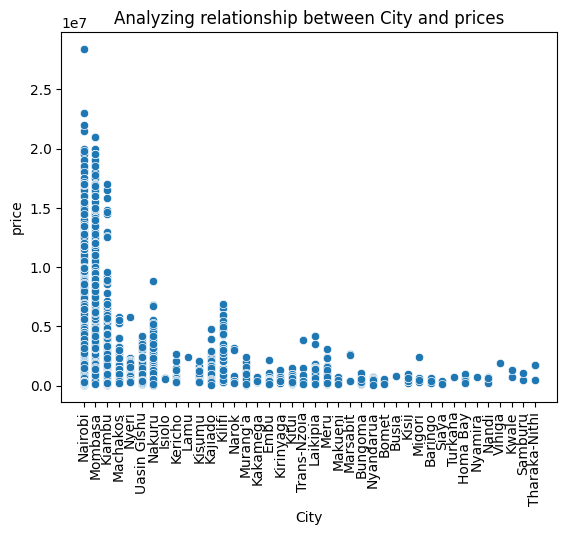

In [33]:
sns.scatterplot(x="City",y="Price",data=cars)
plt.title("Analyzing relationship between City and prices")
plt.xlabel("City")
plt.ylabel("price")
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

## Encoding Categorical Values

In [34]:
# Make a copy of the original DataFrame
carsCopy = cars.copy()

# Columns to label encode
label_encode_cols = ['Make', 'Transmission', 'Mileage', 'Used', 'Location', 'City', 'Area', 'Color']

# Apply Label Encoding to the copy
label_encoder = LabelEncoder()
carsCopy[label_encode_cols] = carsCopy[label_encode_cols].apply(label_encoder.fit_transform)

carsCopy.head(3)

,Make,YOM,Color,Used,Transmission,Mileage,Location,Price,City,Area
0,17,2014,1,1,1,8654,171,2050000,26,80
1,17,2014,14,1,1,4956,179,1380000,26,102
2,17,2013,6,1,1,5718,203,995000,26,225


In [35]:
carsCopy.columns

Index(['Make', 'YOM', 'Color', 'Used', 'Transmission', 'Mileage', 'Location',
       'Price', 'City', 'Area'],
      dtype='object')

In [36]:
carsCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45147 entries, 0 to 45146
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Make          45147 non-null  int32
 1   YOM           45147 non-null  int64
 2   Color         45147 non-null  int32
 3   Used          45147 non-null  int32
 4   Transmission  45147 non-null  int32
 5   Mileage       45147 non-null  int64
 6   Location      45147 non-null  int32
 7   Price         45147 non-null  int64
 8   City          45147 non-null  int32
 9   Area          45147 non-null  int32
dtypes: int32(7), int64(3)
memory usage: 2.2 MB


In [37]:
carsCopy.isnull().sum()

Make            0
YOM             0
Color           0
Used            0
Transmission    0
Mileage         0
Location        0
Price           0
City            0
Area            0
dtype: int64

# Correlation Test
### Pearson's Correlation Coefficient
- Test whether two samples have a linear relationship

H0 : The color and prices are independent

H1 : There is a dependency between the color and prices

In [38]:
print(carsCopy["Color"].dtype)
print(carsCopy["Price"].dtype)


int32
int64


In [39]:
# Now, you can perform the correlation analysis
color = carsCopy["Color"]
prices = carsCopy["Price"]
stat, p = pearsonr(color, prices)

if p > 0.05:
    print(p)
    print("We cannot reject the null hypothesis. Color and Price are not dependent and have no linear relationship.")
else:
    print(p)
    print("We reject the null hypothesis. Color and Price are dependent and have a linear relationship.")

7.63327538235147e-119
We reject the null hypothesis. Color and Price are dependent and have a linear relationship.


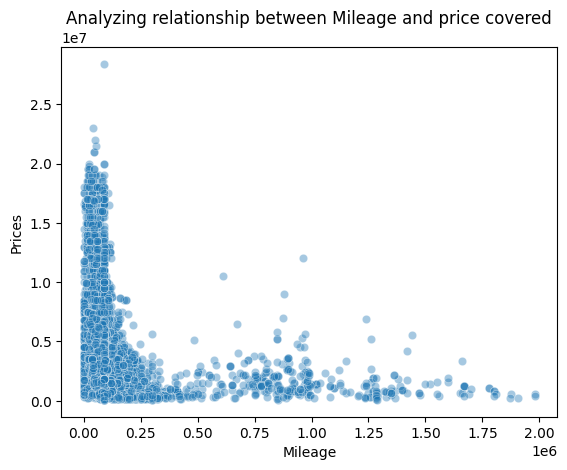

In [40]:
sns.scatterplot(x="Mileage",y="Price",data=cars,alpha=0.4)
plt.title("Analyzing relationship between Mileage and price covered")
plt.xlabel("Mileage")
plt.ylabel("Prices")
plt.show()

In [41]:
mileAge = cars["Mileage"]
prices = cars["Price"]
stat,p = pearsonr(mileAge,prices)
if p > 0.05:
    print(p)
    print("We cannot reject the null hypothesis. Mileage and prices are not dependent and have no linear relationship")
else:
    print(p)
    print("We can reject the null hypothesis. Mileage and Prices are dependent and have linear relationship")

3.1902245045991584e-211
We can reject the null hypothesis. Mileage and Prices are dependent and have linear relationship


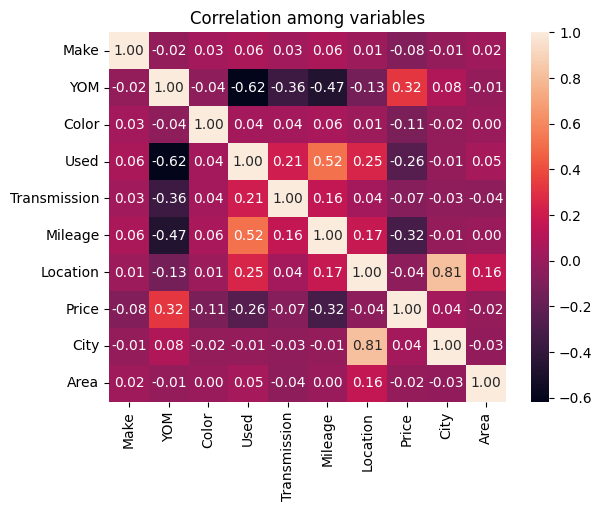

In [42]:
# checking correlation among variables of the data
corr = carsCopy.corr()

sns.heatmap(corr,annot=True,fmt=".2f")
plt.title("Correlation among variables")
plt.show()

# Data Preparation for Machine Learning
- The machine learning algorithms understand only numerical data. In our dataset there are some categorical features which we need to convert into numerical, where each numeric number is a representative of a category. So, in this section we will prepare our data to be fed into machine learning algorithms

- The object columns are Make, YOM, Color, Used, Transmission, Mileage, Location, City and Area. We can replace the unique categorical values in them by integers, where each integer denotes a particular category in that column.

In [43]:
# checking datatypes of columns
carsCopy.dtypes

Make            int32
YOM             int64
Color           int32
Used            int32
Transmission    int32
Mileage         int64
Location        int32
Price           int64
City            int32
Area            int32
dtype: object

In [44]:
carsCopy.shape

(45147, 10)

# Machine Learning
- In the section of machine learning we will predict charges by using all the other features. The charges column is a numerical column. So, this machine learning problem is Regression problem which is a type of supervised machine learning 

- We will cover closed form equation that directly computes the model parameters that best fit the model to the training set.

- The regression problem we are going to tackle is a multiple regression as we will give more than one input to get a single output(charges). It is also a univariate regression problem as we are trying to predict a single value. The multivariate regression problem is used when we need to predict more than a single value.

# Linear Regression
- Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

- This form of analysis estimates the coefficients of the linear equation, involving one or more independent variables that best predict the value of the dependent variable. Linear regression fits a straight line or surface that minimizes the discrepancies between predicted and actual output values.


# Metrics for Performace Evaluation
- Following are the common metrics used to evaluate linear regression model performance.

### Root Mean Squared Error (RMSE)
- RMSE is the square root of the mean of the square of all of the error. RMSE is considered an excellent general-purpose error metric for numerical predictions. RMSE is a good measure of accuracy, but only to compare prediction errors of different models or model configurations for a particular variable and not between variables, as it is scale-dependent. It is the measure of how well a regression line fits the data points. The formula for calculating RMSE is:


- yi^ = Predicted
- yi = Actual
- n = number of obervations

### Mean Absolute Error
- Mean Absolute Error calculates the average difference between the calculated values and actual values. It is also known as scale-dependent accuracy as it calculates error in observations taken on the same scale.It calculates errors between actual values and values predicted by the model. 
- Mean Absolute Error (MAE) is calculated by taking the summation of the absolute difference between the actual and calculated values of each observation over the entire array and then dividing the sum obtained by the number of observations in the array.



- yi = Actual value
- yi^ = predicted value
- n = number of observations

### R-squared error
- R-squared is a goodness of fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale. The more the R-squar value the greater the variance is explained by independent variables in the dependent variable




In [45]:
# Splitting data into features and target
X = carsCopy.copy()
X.drop("Price", axis=1, inplace=True)
y = carsCopy["Price"]


In [46]:
# The data contain variables which have different scales so we are standardizing them.
X_scaled = StandardScaler().fit_transform(X)

In [47]:
# splitting data into training and test set
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=21)

In [48]:
# Create a linear regression model
linear_regression_model = LinearRegression()

# Train the model on the training set
linear_regression_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_regression_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

# Print the RMSE
print("Root Mean Squared Error (RMSE) for Linear Regression: {}".format(rmse))

Root Mean Squared Error (RMSE) for Linear Regression: 1816085.890451281


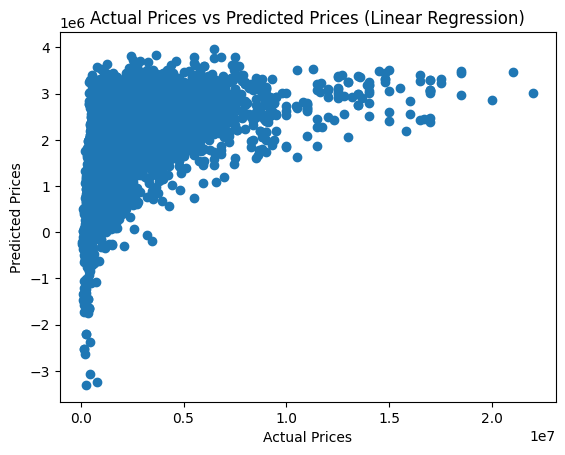

In [49]:
# Plotting actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices (Linear Regression)")
plt.show()